In [1]:
import networkx as nx
import json
from eodc_pg_parser.graph import OpenEOProcessGraph

from openeo.internal.process_graph_visitor import ProcessGraphVisitor, ProcessGraphUnflattener
from eodc_pg_parser.pg_schema import ProcessNode
import json

ImportError: cannot import name 'PGNodeData' from 'eodc_pg_parser.pg_schema' (/home/luk/repos/eodc-api/eodc-pg-parser/eodc_pg_parser/pg_schema.py)

In [3]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))

In [12]:
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)
print("hello")

Deserialised process graph into nested structure


In [10]:
parsed_graph.G.edges

OutEdgeView([('save_result', 'mintime'), ('mintime', 'evi'), ('mintime', 'min'), ('evi', 'dc'), ('evi', 'm3'), ('m3', 'div'), ('div', 'sub'), ('div', 'sum'), ('sub', 'nir'), ('sub', 'red'), ('nir', 'dc'), ('red', 'dc'), ('min', 'evi')])

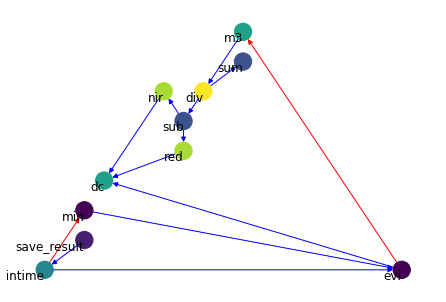

In [11]:
parsed_graph.plot()

In [6]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'save_result': {'format': 'GTiff'},
 'mintime': {'dimension': 't'},
 'evi': {'dimension': 'bands'},
 'dc': {'id': 'Sentinel-2',
  'spatial_extent': {'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2},
  'temporal_extent': ['2018-01-01', '2018-02-01'],
  'bands': ['B02', 'B04', 'B08']},
 'nir': {'label': 'B08'},
 'min': {}}

In [11]:
parsed_graph.G.edges(data=True)

OutEdgeDataView([('save_result', 'mintime', {'reference_type': 'ResultReference', 'arg_name': 'data'}), ('mintime', 'evi', {'reference_type': 'ResultReference', 'arg_name': 'data'}), ('mintime', 'min', {'reference_type': 'Callback', 'arg_name': 'reducer'}), ('evi', 'dc', {'reference_type': 'ResultReference', 'arg_name': 'data'}), ('evi', 'nir', {'reference_type': 'Callback', 'arg_name': 'reducer'}), ('nir', 'evi', {'reference_type': 'ResultReference', 'arg_name': 'data'}), ('min', 'mintime', {'reference_type': 'ResultReference', 'arg_name': 'data'})])

In [7]:
parsed_graph.nodes

[('save_result', {'resolved_kwargs': {'format': 'GTiff'}}),
 ('mintime', {'resolved_kwargs': {'dimension': 't'}}),
 ('evi', {'resolved_kwargs': {'dimension': 'bands'}}),
 ('dc',
  {'resolved_kwargs': {'id': 'Sentinel-2',
    'spatial_extent': {'west': 16.1,
     'east': 16.6,
     'north': 48.6,
     'south': 47.2},
    'temporal_extent': ['2018-01-01', '2018-02-01'],
    'bands': ['B02', 'B04', 'B08']}}),
 ('nir', {'resolved_kwargs': {'label': 'B08'}}),
 ('min', {'resolved_kwargs': {}})]

In [4]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")

In [12]:
for u, v, data in G.in_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)

In [9]:
import networkx as nx
from eodc_pg_parser.pg_schema import PGNodeData


[autoreload of eodc_pg_parser.pg_schema failed: Traceback (most recent call last):
  File "/home/luk/.cache/pypoetry/virtualenvs/eodc-pg-parser-PV1XT9nq-py3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/luk/.cache/pypoetry/virtualenvs/eodc-pg-parser-PV1XT9nq-py3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/luk/.cache/pypoetry/virtualenvs/eodc-pg-parser-PV1XT9nq-py3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/luk/.cache/pypoetry/virtualenvs/eodc-pg-parser-PV1XT9nq-py3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    update_instances(old, new)
  File "/home/luk/.cache/pypoetry/virtualenvs/eodc-pg-parser-PV1XT9nq-py3.9/lib/python3.9/site-packages/IPython/extensions/autoreload

In [11]:
test_G = nx.DiGraph()
test_G.add_node(PGNodeData(node_id="1", process_id="hello"))


-1602397446551786894
-1602397446551786894
-1602397446551786894
-1602397446551786894


In [15]:
for u,outer_d in test_G.nodes(data=True):
    print u.

-1602397446551786894


{}

AttributeError: 'DiGraph' object has no attribute 'plot'